# Практика 4.1 Предварительная обработка данных

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
#https://www.kaggle.com/c/titanic
df = pd.read_csv("data/Titanic-Dataset.csv")
# Survived - целевая переменная

Описание признаков:<br>
* survival	-   Выжившие	(0, 1)<br>
* pclass	    -   класс билета(1 = 1 класс, 2 = 2, 3 = 3)<br>
* sex	        - пол<br>
* Age	        - возраст в годах<br>
* sibsp	    - # количество братьев и сестер / супругов на борту «Титаника»<br>
* parch	    - # родителей / детей на борту «Титаника»<br>
* ticket	    - номер билета<br>
* fare	    - Стоимость проезда пассажира<br>
* cabin	    - номер кабины<br>
* embarked	- Порт посадки (C = Шербур, Q = Куинстаун, S = Саутгемптон)

In [4]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [110]:
df.shape

(891, 12)

In [5]:
# тип столбцов
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [112]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# дубликаты
df.duplicated().sum()

np.int64(0)

In [114]:
# количество пропусков
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# массив с количество пропущенных данных по каждому столбцу
null_d=df.isnull().sum()
print(null_d[null_d>0])

Age         177
Cabin       687
Embarked      2
dtype: int64


In [116]:
# маска
df[df.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: title={'center': 'Пропущенные данные в столбцах'}>

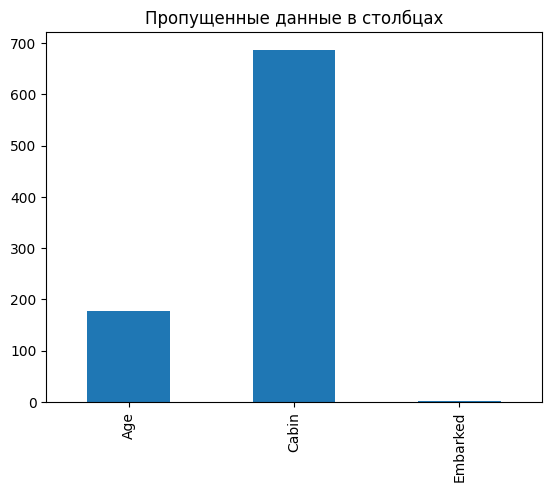

In [117]:
# графическое представление
null_d[null_d>0].plot(kind='bar',title="Пропущенные данные в столбцах")


## Очистка данных


<Axes: >

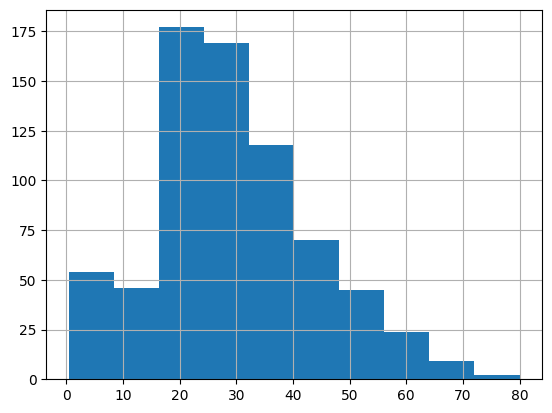

In [118]:
df.Age.hist()

In [119]:
df.Age=df.Age.fillna(df.Age.mean())
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

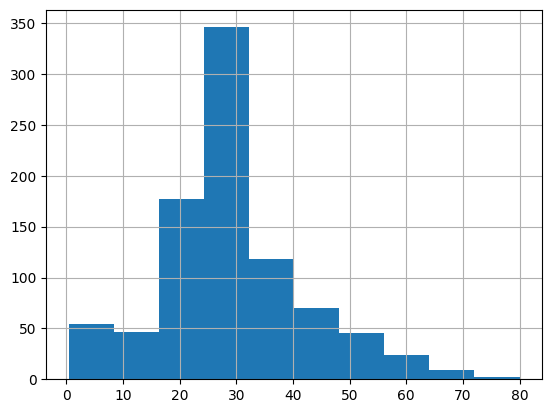

In [120]:
df.Age.hist()

In [121]:
df.PassengerId.nunique()

891

In [122]:
df.Name.nunique()

891

In [123]:
# удалим стобцы с уникальными значениями, столбцы с большим количеством пропусков и малоинформативные столбцы (гипотеза №1)
df.drop(['PassengerId','Name','Ticket','Cabin','Embarked','Fare'],axis=1,inplace=True)

In [124]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
dtype: int64

## Анализ данных

In [10]:
# Признаки с очень высокой абсолютной корреляцией (например, ∣r∣>0.8 или 0.9) могут вызывать мультиколлинеарность в моделях машинного обучения. 
num_cols = df.select_dtypes(include='number').columns

corr_matrix = df[num_cols].corr()
corr_matrix


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


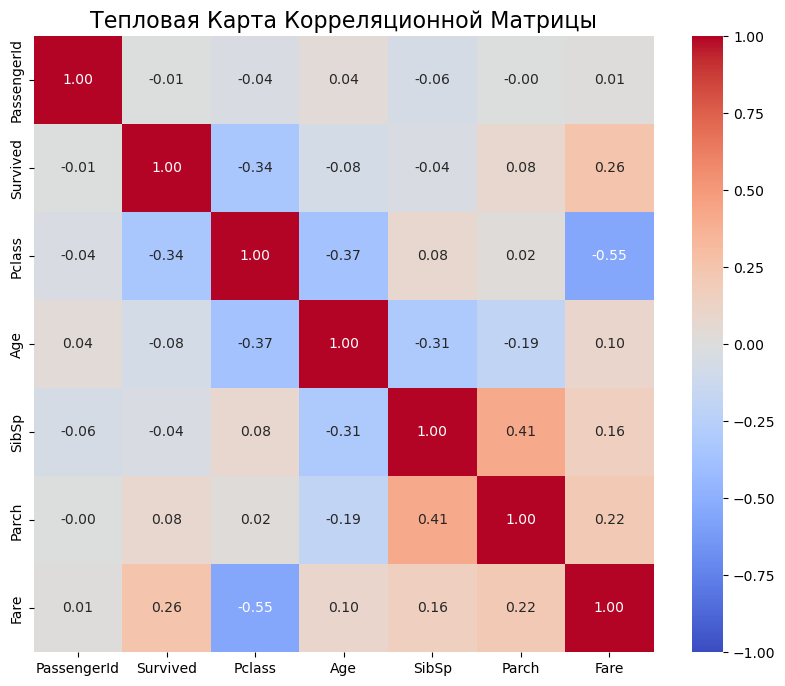

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8)) # Задаем размер графика для лучшей читаемости

sns.heatmap(
    corr_matrix, 
    annot=True,     # Показывать числовые значения корреляции на карте
    fmt=".2f",      # Формат чисел (2 знака после запятой)
    cmap='coolwarm',# Выбор цветовой палитры (coolwarm хорошо показывает как положительную, так и отрицательную корреляцию)
    vmin=-1,        # Минимальное значение для цветовой шкалы
    vmax=1          # Максимальное значение для цветовой шкалы
)

plt.title('Тепловая Карта Корреляционной Матрицы', fontsize=16) # Добавляем заголовок
plt.show() 

In [127]:
# баланс классов
df.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

([<matplotlib.axis.XTick at 0x2001603f890>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

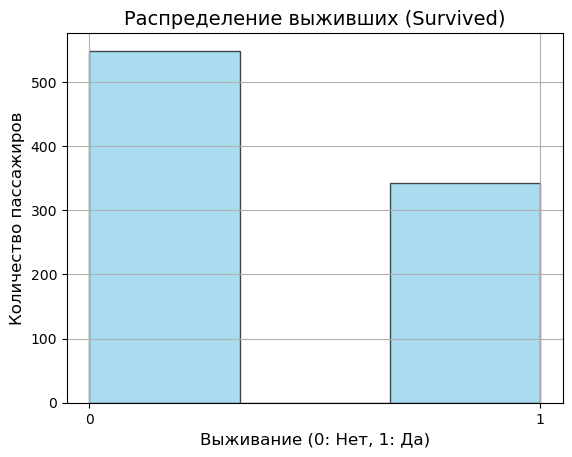

In [12]:
# Создаем гистограмму и добавляем базовое форматирование
df.Survived.hist(
    bins=3,             # Устанавливаем 3 корзины для четкого разделения 0 и 1
    color='skyblue',    # Цвет колонок
    edgecolor='black',  # Цвет границ
    alpha=0.7           # Прозрачность
)

# Добавляем подписи и заголовок
plt.title('Распределение выживших (Survived)', fontsize=14)
plt.xlabel('Выживание (0: Нет, 1: Да)', fontsize=12)
plt.ylabel('Количество пассажиров', fontsize=12)

# Устанавливаем метки на оси X для ясности
plt.xticks([0, 1])

#### Столбец Пол

In [129]:
df.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

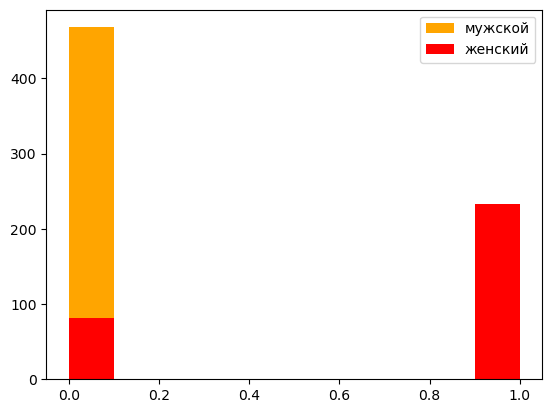

In [13]:
plt.hist(x=df[df['Sex']=='male']['Survived'], color='orange',label='мужской')
plt.hist(x=df[df['Sex']=='female']['Survived'], color='red',label='женский')
plt.legend()

Text(0.5, 1.0, 'Распределение значений в столбце Пол')

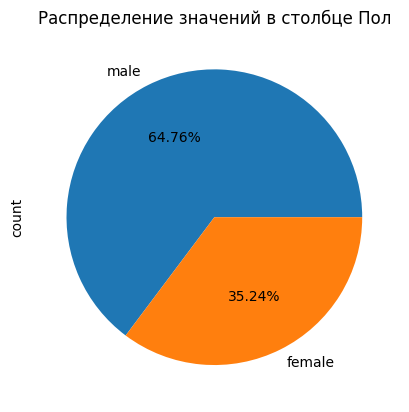

In [131]:
df.Sex.value_counts().plot.pie(autopct='%.2f%%')
plt.title("Распределение значений в столбце Пол")


Text(0.5, 1.0, 'Распределение выживших и нет в зависимости от Пола')

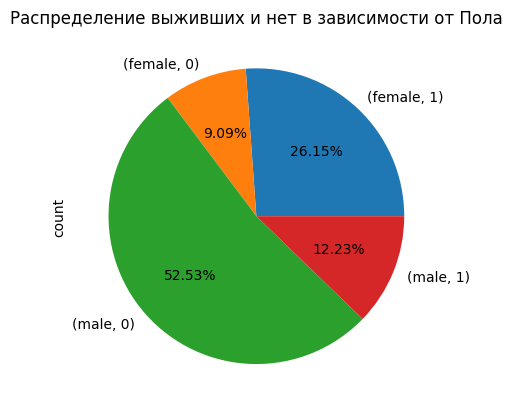

In [132]:
gpsex=df.Survived.groupby(df.Sex).value_counts()
gpsex.plot.pie(autopct='%.2f%%')
plt.title("Распределение выживших и нет в зависимости от Пола")

#### Столбец Класс билета

In [14]:
# сгруппируем данные по классам билетов и выживанию пассажиров
grouped_by_pclass_data = df.Survived.groupby(df.Pclass).value_counts()
grouped_by_pclass_data

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

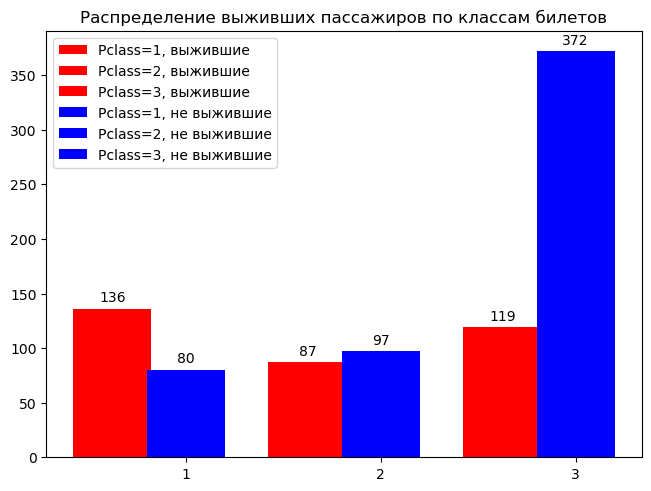

In [15]:
fig, ax = plt.subplots(layout='constrained')
w = 0.25
# найдем общее количество выживших пассажиров в каждом классе
for pcls in range(3):
    data = df[(df['Pclass']==pcls+1)&(df['Survived']==1)]['Survived'].value_counts().sum()
    rects = ax.bar(w, data, color='red', label=f"Pclass={pcls+1}, выжившие")
    ax.bar_label(rects, padding=3)
    w+=2
    
w = 1
# найдем общее количество не выживших пассажиров в каждом классе
for pcls in range(3):
    data = df[(df['Pclass']==pcls+1)&(df['Survived']==0)]['Survived'].value_counts().sum()
    rects = ax.bar(w, data, color='blue', label=f"Pclass={pcls+1}, не выжившие")
    ax.bar_label(rects, padding=3)
    w+=2

ax.set_xticks((1,3,5), ("1", "2", "3"))
plt.title("Распределение выживших пассажиров по классам билетов")
plt.legend()

#### Столбец Возраст

In [135]:
age=df.Age.groupby(df.Survived).value_counts()
age

Survived  Age      
0         29.699118    125
          21.000000     19
          28.000000     18
          25.000000     17
          18.000000     17
                      ... 
1         0.420000       1
          0.670000       1
          0.920000       1
          7.000000       1
          80.000000      1
Name: count, Length: 144, dtype: int64

In [136]:
age=df.Age.groupby(df.Survived).value_counts()
age

Survived  Age      
0         29.699118    125
          21.000000     19
          28.000000     18
          25.000000     17
          18.000000     17
                      ... 
1         0.420000       1
          0.670000       1
          0.920000       1
          7.000000       1
          80.000000      1
Name: count, Length: 144, dtype: int64

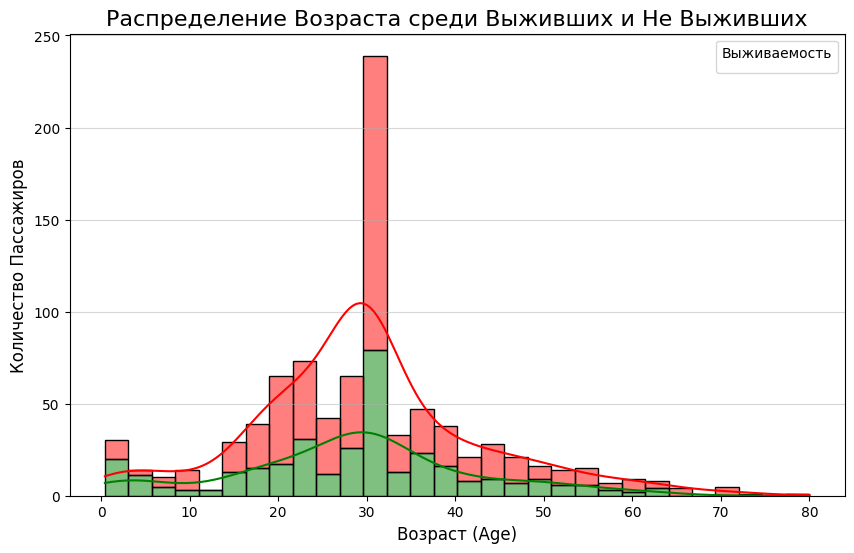

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Строим гистограмму
sns.histplot(
    data=df,            # Исходный DataFrame
    x='Age',            # Столбец для распределения (возраст)
    hue='Survived',     # Столбец для группировки (выжившие/не выжившие)
    multiple='stack',   # Наложение гистограмм (stack - суммирование)
    kde=True,           # Добавление оценки плотности ядра (плавной кривой)
    palette={0: 'red', 1: 'green'}, # Цвета для категорий (0=Не выжил, 1=Выжил)
    bins=30             # Количество "корзин" (диапазонов возраста)
)

# Настройка заголовка и меток
plt.title('Распределение Возраста среди Выживших и Не Выживших', fontsize=16)
plt.xlabel('Возраст (Age)', fontsize=12)
plt.ylabel('Количество Пассажиров', fontsize=12)

# Изменение меток легенды для ясности
legend_labels = {0: 'Не выжил', 1: 'Выжил'}
h, l = plt.gca().get_legend_handles_labels()
plt.legend(h, [legend_labels[int(label)] for label in l], title='Выживаемость')

plt.grid(axis='y', alpha=0.5)
plt.show()

In [138]:
df[df['Survived']==1]['Age'].max()

80.0

In [139]:
df[df['Survived']==0]['Age'].max()

74.0

## Преобразование данных


In [16]:
# кодируем пол пассажира как бинарный признак (0,1)
df = pd.get_dummies(df,drop_first=True, prefix="bin", columns=['Sex'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  bin_male     891 non-null    bool   
dtypes: bool(1), float64(2), int64(5), object(4)
memory usage: 77.6+ KB


In [142]:
df.rename(columns={'bin_male':'bin_sex'})

,Survived,Pclass,Age,SibSp,Parch,bin_sex
0,0,3,22.000000,1,0,True
1,1,1,38.000000,1,0,False
2,1,3,26.000000,0,0,False
3,1,1,35.000000,1,0,False
4,0,3,35.000000,0,0,True
...,...,...,...,...,...,...
886,0,2,27.000000,0,0,True
887,1,1,19.000000,0,0,False
888,0,3,29.699118,1,2,False
889,1,1,26.000000,0,0,True


## Разделение данных на признаки и целевую переменную


In [20]:
# признаки
x=df.drop('Survived',axis=1)
# целевая переменная
y=df.Survived

In [21]:
x.shape,y.shape

((891, 11), (891,))

## Разделение на тестовые и тренировочные


In [22]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42,shuffle=True)

In [28]:
y_test


709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64